In [9]:
#Load Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_columns=None

In [90]:
# #Read all csvs 
meddf = pd.read_csv('medicareappended.csv')
# df1 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2014.csv')
# df2 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2015.csv')
# df3 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2016.csv')
meddf.head(10)

,Unnamed: 0,NPI,state,claim_count,specialty,opioid_count,Year
0,0,1447268107,NY,18,Pharmacist,0.0,2013
1,1,1174856348,CA,84,Clinic/Center,0.0,2013
2,2,1720181522,FL,29,Internal Medicine,0.0,2013
3,3,1821285826,FL,27,Urology,0.0,2013
4,4,1457520132,WA,28,Dentist,0.0,2013
5,5,1649426404,ME,17,Dentist,0.0,2013
6,6,1134381320,CA,13,Psychiatry & Neurology,0.0,2013
7,7,1437329034,LA,29,Ophthalmology,0.0,2013
8,8,1194830265,NY,55,Family Practice,0.0,2013
9,9,1437186798,CA,48,Internal Medicine,0.0,2013


In [91]:
# #Create Column for year
# df['Year'] = 2013
# df1['Year'] = 2014
# df2['Year'] = 2015
# df3['Year'] = 2016

In [92]:
# #Append Files together 
# df_apped = df.append(df2, sort=True)
# dfp = df_apped.append(df1, sort= True)
# dfpp = dfp.append(df3, sort=True)

In [93]:
#Notice all the missing values or blanks in the data...replace with zero 
meddf.count()

Unnamed: 0      4356141
NPI             4356141
state           4356141
claim_count     4356141
specialty       4356141
opioid_count    4356141
Year            4356141
dtype: int64

In [99]:
#Only selecting the columns I want 
df_clean = meddf[['state','claim_count','specialty','opioid_count','Year']]
df_clean.head(10)

,state,claim_count,specialty,opioid_count,Year
0,NY,18,Pharmacist,0.0,2013
1,CA,84,Clinic/Center,0.0,2013
2,FL,29,Internal Medicine,0.0,2013
3,FL,27,Urology,0.0,2013
4,WA,28,Dentist,0.0,2013
5,ME,17,Dentist,0.0,2013
6,CA,13,Psychiatry & Neurology,0.0,2013
7,LA,29,Ophthalmology,0.0,2013
8,NY,55,Family Practice,0.0,2013
9,CA,48,Internal Medicine,0.0,2013


In [103]:
grouped_states2 = df_clean.groupby('state').sum()
grouped_states2
#Create a sepreate dataframe that only take that column 
statesdf = grouped_states[['claim_count','opioid_count']]
statesdf = statesdf.sort_values(by = 'state')
statesdf

,claim_count,opioid_count
state,,
AA,6857,852.0
AE,67338,6595.0
AK,5230506,351955.0
AL,115794089,8863384.0
AP,25240,2594.0
AR,69987485,4563590.0
AS,3054,195.0
AZ,94787867,6455743.0
CA,540764543,28581006.0


In [ ]:
df_clean.to_csv('medicareappendednonpi.csv')
statesdf.to_csv('prescripton_by_state.csv')

In [65]:
#Group by Year
#Reset the dataframes for both...column is not callable until you do so
claims_year = df_clean[['Year','claim_count']]
opioids_year = df_clean[['Year','opioid_count']]
grouped_cyears = claims_year.groupby('Year').sum().reset_index()
grouped_oyears = opioids_year.groupby('Year').sum().reset_index()

In [67]:
#Merge the datasets together...BOOM
year_merge = pd.merge(grouped_cyears, grouped_oyears)
year_merge['opioid_percent'] = (year_merge['opioid_count'] / year_merge['claim_count'])*100
year_merge.head(10)

,Year,claim_count,opioid_count,opioid_percent
0,2013,1367999818,78712328.0,5.753826
1,2014,1414071984,80282426.0,5.677393
2,2015,1447170686,78842061.0,5.448014
3,2016,1480972766,78145305.0,5.276620


In [68]:
#Create a sepreate dataframe that only take needed column 
year_percent = year_merge[['Year', 'opioid_percent']]
#df30 = df30.set_index('specialty')
year_percent.head(10)

,Year,opioid_percent
0,2013,5.753826
1,2014,5.677393
2,2015,5.448014
3,2016,5.276620


In [69]:
# Orient widths. Add labels, tick marks, etc.
xlabs = year_percent.loc[: ,'Year'].tolist()
xlabs

[2013, 2014, 2015, 2016]

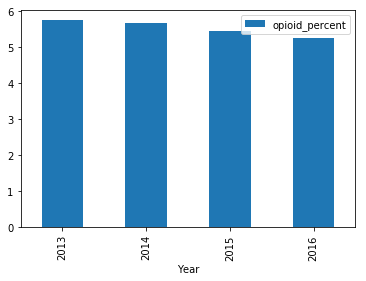

In [81]:
year_percent.plot("Year","opioid_percent", kind = 'bar')

In [45]:
#Group by Specialty
#Reset the dataframes for both...column is not callable until you do so
claims_special = df_clean[['specialty','claim_count']]
opioids_special = df_clean[['specialty','opioid_count']]
grouped_claims = claims_special.groupby('specialty').sum().reset_index()
grouped_opioid = opioids_special.groupby('specialty').sum().reset_index()

In [46]:
#Merge the datasets together...BOOM
special_merge = pd.merge(grouped_claims, grouped_opioid)
special_merge.head(10)

,specialty,claim_count,opioid_count
0,Acupuncturist,39919,1488.0
1,Addiction Medicine,674115,98965.0
2,Adult Companion,1679,0.0
3,Advanced Practice Dental Therapist,165,0.0
4,All Other Suppliers,210,0.0
5,Allergy/ Immunology,2663127,22737.0
6,Allergy/Immunology,7368676,62933.0
7,Alzheimer Center (Dementia Center),40,0.0
8,Ambulance Service Supplier,540,48.0
9,Ambulatory Surgical Center,4422,400.0


In [ ]:
#Group by Specialty
#Reset the dataframes for both...column is not callable until you do so
claims_special = df_clean[['specialty','claim_count']]
opioids_special = df_clean[['specialty','opioid_count']]
grouped_claims = claims_special.groupby('specialty').sum().reset_index()
grouped_opioid = opioids_special.groupby('specialty').sum().reset_index()

In [47]:
#Create a column to show the percentage of opioids by overall drugs perscribed 
special_merge['opioid_percent'] = (special_merge['opioid_count'] / special_merge['claim_count'])*100
special_merge_df = pd.DataFrame(special_merge).sort_values(by ='opioid_percent', ascending = False)
special_100 = special_merge_df.head(100)
special_100.head(10)


,specialty,claim_count,opioid_count,opioid_percent
181,Pain Management,13759671,7833359.0,56.929842
116,Interventional Pain Management,16988702,9614500.0,56.593494
92,Hand Surgery,835455,462414.0,55.348762
12,Anesthesiology,19937443,10705790.0,53.696906
175,Orthopedic Surgery,28585000,13181847.0,46.114560
54,"Day Training, Developmentally Disabled Services",96,44.0,45.833333
194,Physical Medicine and Rehabilitation,28489929,11927966.0,41.867307
152,Neurosurgery,3773174,1537677.0,40.752878
159,"Nursing Facility, Other (Dmercs Only)",907,338.0,37.265711
30,Certified Registered Nurse Anesthetist (CRNA),47901,16448.0,34.337488


In [62]:
#Create a sepreate dataframe that only take that column 
df = special_100[['specialty', 'opioid_percent']]
df = df.set_index('specialty')
df

,opioid_percent
specialty,
Pain Management,56.929842
Interventional Pain Management,56.593494
Hand Surgery,55.348762
Anesthesiology,53.696906
Orthopedic Surgery,46.114560
"Day Training, Developmentally Disabled Services",45.833333
Physical Medicine and Rehabilitation,41.867307
Neurosurgery,40.752878
"Nursing Facility, Other (Dmercs Only)",37.265711


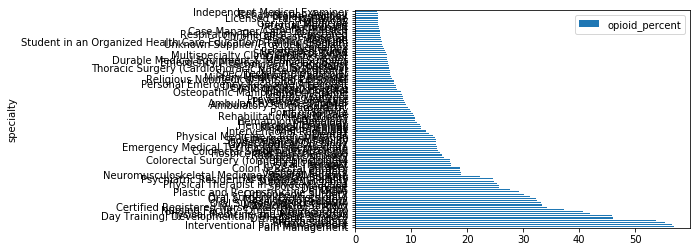

In [63]:
df.plot.barh()

In [60]:
special_30 = special_merge_df.head(30)
#Create a sepreate dataframe that only take that column 
df30 = special_30[['specialty', 'opioid_percent']]
df30 = df30.set_index('specialty')
df30.head(10)

,opioid_percent
specialty,
Pain Management,56.929842
Interventional Pain Management,56.593494
Hand Surgery,55.348762
Anesthesiology,53.696906
Orthopedic Surgery,46.114560
"Day Training, Developmentally Disabled Services",45.833333
Physical Medicine and Rehabilitation,41.867307
Neurosurgery,40.752878
"Nursing Facility, Other (Dmercs Only)",37.265711


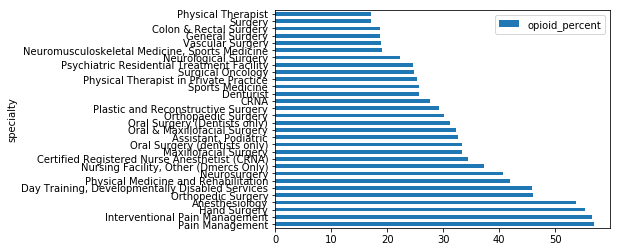

In [61]:
df30.plot.barh()